# Import libraries

In [ ]:
from tqdm import tqdm
import pickle
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [ ]:
def loadData(path):
    imagePaths = list(paths.list_images(path))
    data = []
    labels = []

    for imagePath in tqdm(imagePaths):
        label = imagePath.split(os.path.sep)[-2]
        # Read image
        imageGray = cv2.imread(imagePath, 0)

        # Resize
        imageResize = cv2.resize(imageGray, (128,128))

        # Rescale
        imageRescale = imageResize / 255.

        # Flatten image
        dataFlatten = imageRescale.flatten()

        data.append(dataFlatten)
        labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [ ]:
xTrain, yTrain = loadData(('/content/drive/MyDrive/CS331/data/train'))

100%|██████████| 4000/4000 [16:08<00:00,  4.13it/s]


In [ ]:
xTest, yTest = loadData(('/content/drive/MyDrive/CS331/data/test'))

100%|██████████| 1000/1000 [04:20<00:00,  3.84it/s]


In [ ]:
lb = LabelEncoder()
yTrain = lb.fit_transform(yTrain)
yTest = lb.fit_transform(yTest)

In [ ]:
labelMapping = dict(zip(lb.classes_, lb.transform(lb.classes_)))
print(labelMapping)

{'heart': 0, 'oblong': 1, 'oval': 2, 'round': 3, 'square': 4}


# Train model

In [ ]:
model = SVC()
model.fit(xTrain, yTrain)

SVC()

In [ ]:
yTestPre = model.predict(xTest)
print("Test Accuracy:", accuracy_score(yTest, yTestPre))

Test Accuracy: 0.3663663663663664


In [ ]:
print(classification_report(yTest, yTestPre,target_names=['heart', 'oblong', 'oval', 'round', 'square']))

              precision    recall  f1-score   support

       heart       0.33      0.36      0.35       200
      oblong       0.37      0.47      0.41       200
        oval       0.27      0.17      0.20       200
       round       0.45      0.41      0.43       199
      square       0.38      0.43      0.41       200

    accuracy                           0.37       999
   macro avg       0.36      0.37      0.36       999
weighted avg       0.36      0.37      0.36       999



Text(24.0, 0.5, 'Ground Truth')

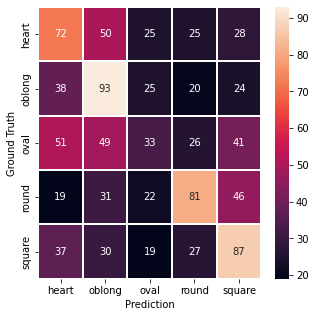

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(yTest, yTestPre, labels=model.classes_)
sns.set(font_scale=1.6)
sns.heatmap(cm, linewidths=1, annot=True, ax=ax, fmt='g', 
            xticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            yticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            )
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')


# Save model

In [ ]:
with open('/content/drive/MyDrive/CS331/FromRaw/SVM/svmModel-128.pkl','wb') as f:
    pickle.dump(model,f)

# Load model

In [ ]:
with open('/content/drive/MyDrive/CS331/FromRaw/SVM/svmModel-128.pkl', 'rb') as f:
    model128 = pickle.load(f)

In [ ]:
    yTestPre = model128.predict(xTest)
print("Test Accuracy:", accuracy_score(yTest, yTestPre))

Test Accuracy: 0.3663663663663664
